<a href="https://colab.research.google.com/github/sambhajizambre/Project/blob/main/Capstone%20Project%201-propensity%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE PROJECT 1 : PROPENSITY MODEL

**About the Project** :

We have large number of customers.Our sales team would like to call potential customers who can buy our service. We dont have enough manpower and time to call and reach every customer and convince them for our products. Also we need to rank customers so that we could offer them our product and services with discounted price.

**Requirenments**:-

Customer segmentation : High value and Low value
Potential Vs Nonpotential

Who can buy our service in current month- Prediction (Predict sale for 30, 60, 90 days)

Customer Lifetime value (Cltv) - Live Vs Dead Customers

Cohort analysis

Recency , Frequency and Monetary analysis.

**List of all the python libraries that are required**:

**Pandas** Library will be required to work with data in tabular representation.

**Numpy** Library will be required to round the data in the correlation matrix.

**Datetime** Library required to deal the data w.r.t. date, time month format.

**Matplotlib, seaborn, plotly** Library required for data visualization.

In [4]:
# propensity model
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import xlrd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
np.random.seed(42)

**1) Import DATA FROM GOOGLE DRIVE :-** online Retail Customer Data

In [5]:
df=pd.read_excel("/content/drive/MyDrive/python/Online Retail.xlsx")

In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 2) Data Information 



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [10]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

3)** Data Cleaning**

In [12]:
# remove Null values from data
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**4) Data processing**

**Adding New column as Total Cost**

In [14]:
df['TotalCost'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


**5)Group by with customerID**

In [15]:
Customer_count=df.groupby('CustomerID')
Customer_count.first()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalCost
CustomerID,,,,,,,,
12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,77183.60
12347.0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,25.20
12348.0,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,Finland,39.60
12349.0,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,Italy,15.00
12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,Norway,25.20
...,...,...,...,...,...,...,...,...
18280.0,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-03-07 09:52:00,7.90,United Kingdom,23.70
18281.0,556464,22037,ROBOT BIRTHDAY CARD,12,2011-06-12 10:53:00,0.42,United Kingdom,5.04
18282.0,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,2011-08-05 13:35:00,12.75,United Kingdom,12.75


In [16]:
country_price=df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


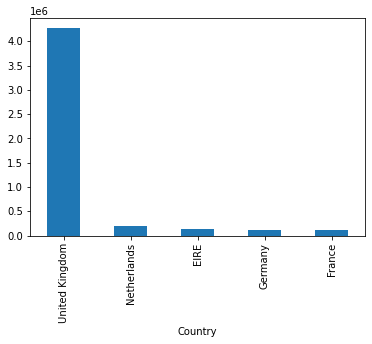

In [17]:
#Top companies with high number of purchase
country_price[:5].plot(kind='bar')

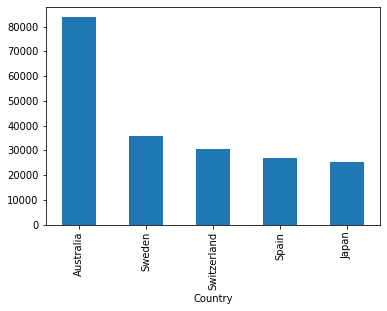

In [18]:
country_price[5:10].plot(kind='bar')

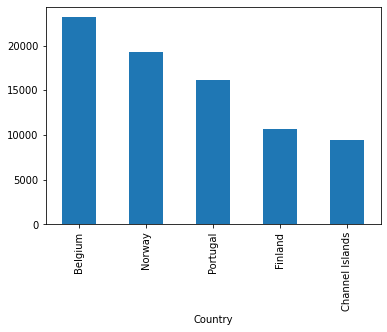

In [19]:
country_price[10:15].plot(kind='bar')

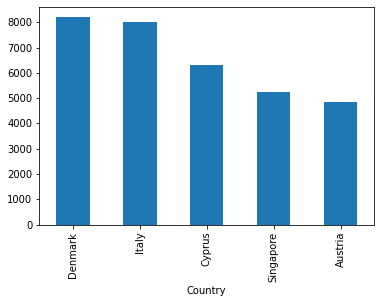

In [20]:
country_price[15:20].plot(kind='bar')

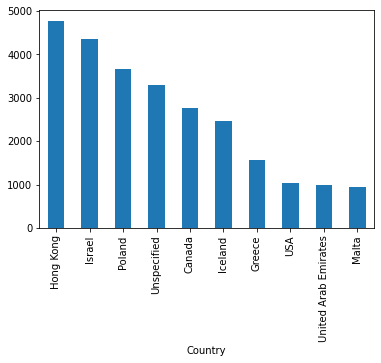

In [21]:
country_price[20:30].plot(kind='bar')

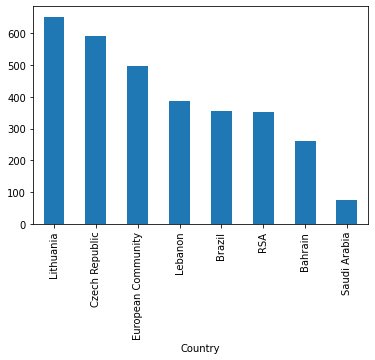

In [22]:
country_price[30:40].plot(kind='bar')

**6)Groupby with country**

In [23]:
Places=df.groupby('Country')
Places.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
395472,571035,21238,RED RETROSPOT CUP,8,2011-10-13 12:50:00,0.85,12446.0,RSA,6.80
395473,571035,21243,PINK POLKADOT PLATE,8,2011-10-13 12:50:00,1.69,12446.0,RSA,13.52
395474,571035,23240,SET OF 4 KNICK KNACK TINS DOILY,6,2011-10-13 12:50:00,4.15,12446.0,RSA,24.90
395475,571035,23209,LUNCH BAG VINTAGE DOILY,10,2011-10-13 12:50:00,1.65,12446.0,RSA,16.50


In [64]:
PerCustomer_price=df.groupby("CustomerID")["UnitPrice"].sum().sort_values(ascending=False)
PerCustomer_price

CustomerID
14096.0    41376.33
15098.0    40278.90
14911.0    31060.66
12744.0    25108.89
16029.0    24111.14
             ...   
17752.0        0.42
13366.0        0.39
12875.0        0.34
15118.0        0.17
13256.0        0.00
Name: UnitPrice, Length: 4372, dtype: float64

In [57]:
PerCustomer_price=df.groupby("CustomerID")["UnitPrice"].sum().sort_values(ascending=False)
PerCustomer_price.head(10)

CustomerID
14096.0    41376.33
15098.0    40278.90
14911.0    31060.66
12744.0    25108.89
16029.0    24111.14
17841.0    20333.18
12748.0    15115.60
12536.0    13255.22
12757.0     8035.24
14606.0     7839.02
Name: UnitPrice, dtype: float64

In [59]:
PerCustomer_price=df.groupby("CustomerID")["UnitPrice"].sum().sort_values(ascending=False)
PerCustomer_price.tail(20)

CustomerID
18113.0    1.06
17443.0    1.06
16148.0    1.06
15603.0    1.01
15744.0    0.87
18133.0    0.85
16093.0    0.85
17715.0    0.85
13841.0    0.85
18184.0    0.83
13135.0    0.72
16881.0    0.72
13099.0    0.72
15753.0    0.55
14609.0    0.49
17752.0    0.42
13366.0    0.39
12875.0    0.34
15118.0    0.17
13256.0    0.00
Name: UnitPrice, dtype: float64

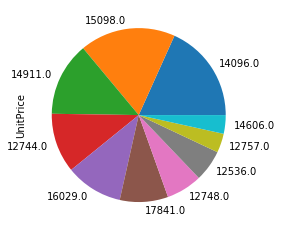

In [63]:
PerCustomer_price.head(10).plot(kind='pie')

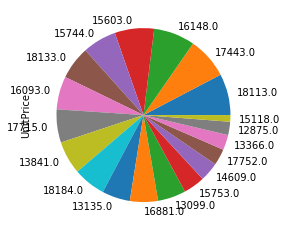

In [67]:
PerCustomer_price.tail(20).plot(kind='pie')

In [68]:
#Adding year feature to the dataset
timest = df['InvoiceDate'].dt.year
df['Year'] = timest
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Year,mon,month,Month,Time,Day,Quarter,Day of Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,December,12,08:26:00,1,4,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,12,08:26:00,1,4,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,December,12,08:26:00,1,4,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,12,08:26:00,1,4,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December,12,08:26:00,1,4,Wednesday


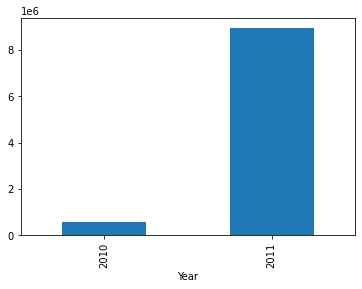

In [69]:
#Total sales for different years
df.groupby('Year')['TotalCost'].sum().plot(kind = 'bar')

In [24]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [25]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [26]:
df_recency = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID','LastPurshaceDate']
df_recency['Recency'] = df_recency['LastPurshaceDate'].apply(lambda x:(NOW - x) .days)
df_recency.drop('LastPurshaceDate',axis=1,inplace=True)
df_recency.head()


,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [27]:
df.dropna(inplace=True)
df.shape

(406829, 9)

In [28]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalCost
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [29]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,-41.40
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-39.60
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,-25.50


In [30]:
df.shape

(406829, 9)

In [31]:
df['Quantity'] = df['Quantity'].abs()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [32]:
df['TotalCost']=df['TotalCost'].abs()

In [33]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalCost
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460471,15287.690570,23.407255
std,248.624170,69.315162,1713.600303,427.437730
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13953.000000,4.680000
50%,5.000000,1.950000,15152.000000,11.800000
75%,12.000000,3.750000,16791.000000,19.800000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [34]:
Customer_count=df.groupby('CustomerID')
Customer_count.first()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalCost
CustomerID,,,,,,,,
12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,77183.60
12347.0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,25.20
12348.0,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,Finland,39.60
12349.0,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,Italy,15.00
12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,Norway,25.20
...,...,...,...,...,...,...,...,...
18280.0,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-03-07 09:52:00,7.90,United Kingdom,23.70
18281.0,556464,22037,ROBOT BIRTHDAY CARD,12,2011-06-12 10:53:00,0.42,United Kingdom,5.04
18282.0,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,2011-08-05 13:35:00,12.75,United Kingdom,12.75


In [35]:
nation=df.groupby('Country')
nation.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
395472,571035,21238,RED RETROSPOT CUP,8,2011-10-13 12:50:00,0.85,12446.0,RSA,6.80
395473,571035,21243,PINK POLKADOT PLATE,8,2011-10-13 12:50:00,1.69,12446.0,RSA,13.52
395474,571035,23240,SET OF 4 KNICK KNACK TINS DOILY,6,2011-10-13 12:50:00,4.15,12446.0,RSA,24.90
395475,571035,23209,LUNCH BAG VINTAGE DOILY,10,2011-10-13 12:50:00,1.65,12446.0,RSA,16.50


# **RFM analysis (Recency,Frequency,Monetary value)** 

In [36]:
RFM_df = df.groupby("CustomerID").agg \
                                    ({"InvoiceDate" : lambda InvoiceDate :(NOW - InvoiceDate.max()).days,  # Recency
                                     "InvoiceNo" : lambda InvoiceNo : InvoiceNo.nunique(),  # Frequency
                                     "TotalCost":  lambda TotalCost: TotalCost.sum()})    # Monetary
RFM_df

,InvoiceDate,InvoiceNo,TotalCost
CustomerID,,,
12346.0,325,2,154367.20
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,179.50


In [37]:
RFM_df.columns=['Recency','frequency','monetary_value']
RFM_df.head(10)

,Recency,frequency,monetary_value
CustomerID,,,
12346.0,325,2,154367.20
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40
12352.0,36,11,3466.67
12353.0,204,1,89.00
12354.0,232,1,1079.40
12355.0,214,1,459.40


In [38]:
RFM_df["Recency_Score"]  = pd.qcut(RFM_df["Recency"], 5, [5, 4, 3, 2, 1])
RFM_df["Frequency_Score"]  = pd.qcut(RFM_df['frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
RFM_df["Monetary_Score"]  = pd.qcut(RFM_df['monetary_value'], 5, [1, 2, 3, 4, 5])
RFM_df["RFM_SCORE"] = (RFM_df['Recency_Score'].astype(str) +
                    RFM_df['Frequency_Score'].astype(str))
RFM_df.head()

,Recency,frequency,monetary_value,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE
CustomerID,,,,,,,
12346.0,325,2,154367.20,1,2,5,12
12347.0,2,7,4310.00,5,4,5,54
12348.0,75,4,1797.24,2,3,4,23
12349.0,18,1,1757.55,4,1,4,41
12350.0,310,1,334.40,1,1,2,11


In [39]:
country_price=df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
country_price

Country
United Kingdom          4530411
Netherlands              201746
EIRE                     144721
Germany                  121078
France                   113096
Australia                 84765
Sweden                    36529
Switzerland               30388
Spain                     29078
Japan                     26814
Belgium                   23322
Norway                    19429
Portugal                  16200
Finland                   10742
Channel Islands            9503
Denmark                    8282
Italy                      8225
Cyprus                     6405
Singapore                  5248
Austria                    4935
Israel                     4102
USA                        3882
Poland                     3715
Canada                     2763
Iceland                    2458
Unspecified                1789
Greece                     1558
Malta                       996
United Arab Emirates        982
Czech Republic              750
Lithuania                   652


In [40]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [41]:
#Top 10 countries with high number of purchase
country_price[:10]

Country
United Kingdom    4530411
Netherlands        201746
EIRE               144721
Germany            121078
France             113096
Australia           84765
Sweden              36529
Switzerland         30388
Spain               29078
Japan               26814
Name: Quantity, dtype: int64

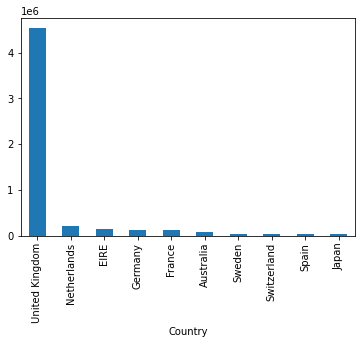

In [42]:
country_price[:10].plot(kind='bar')

The above graph shows the percentage of orders from the top 10 countries, sorted by the number of orders. This shows that more than 90% of orders are coming from United Kingdom and no other country even makes up 3% of the orders in the data

In [43]:
#Finding year wise sell to the dataset
timest = df['InvoiceDate'].dt.year
df['Year'] = timest
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010


In [44]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Year
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011


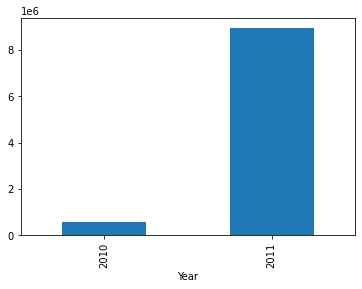

In [45]:
df.groupby('Year')['TotalCost'].sum().plot(kind = 'bar')

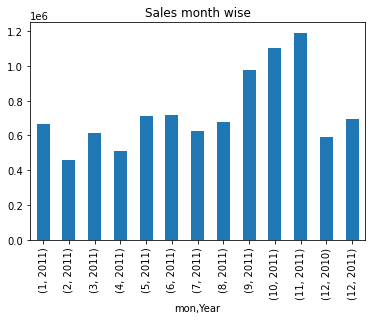

In [46]:
#Sales for different month
df['mon']=df['InvoiceDate'].dt.month
df['month']=df['InvoiceDate'].dt.month_name()
df.groupby(['mon','Year'])['TotalCost'].sum().plot(kind = 'bar', title = 'Sales month wise')

In [4]:
#Now let's check the total quantity and by country
df.groupby("Quantity").sum()["country"].sort_values(ascending = False).head(10)
#data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10)

NameError: ignored

In [48]:
#Date Time Analysis
df.loc[:, "Month"] = df.InvoiceDate.dt.month
df.loc[:, "Time"] = df.InvoiceDate.dt.time
df.loc[:, "Year"] = df.InvoiceDate.dt.year
df.loc[:, "Day"] = df.InvoiceDate.dt.day
df.loc[:, "Quarter"] = df.InvoiceDate.dt.quarter
df.loc[:, "Day of Week"] = df.InvoiceDate.dt.dayofweek

In [49]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [50]:
df["Day of Week"] = df["Day of Week"].map(dayofweek_mapping)

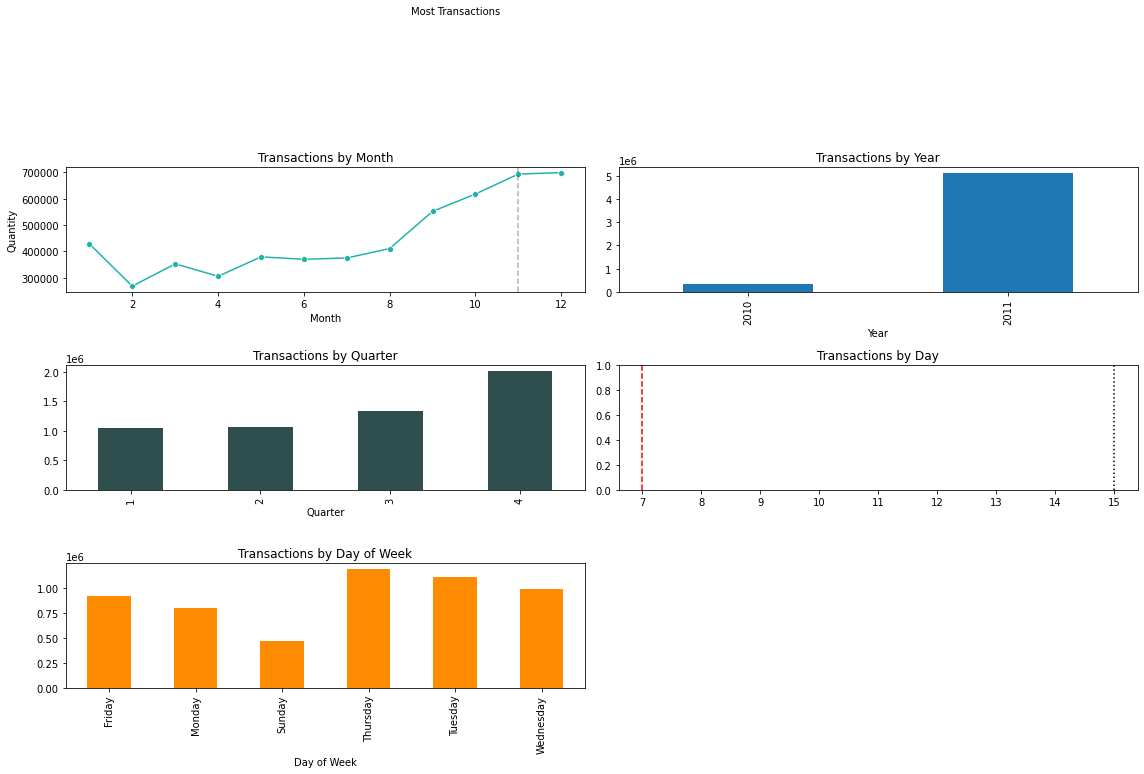

In [51]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = df.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
df.groupby("Year").sum()["Quantity"].plot(kind = "bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
df.groupby("Quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.subplot(3,2,4)
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(3,2,5)
df.groupby("Day of Week").sum()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()